# Eval logits vs layer

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")
sys.path.append("../../../")

import pickle
import numpy as np
import matplotlib.pyplot as plt


import zxreinforce.own_constants as oc
from zxreinforce.action_conversion_utils import  get_action_name

In [2]:
add = "_1000_"

with open(f"dist_lay/res_lists_logs_all{add}", 'rb') as f:
    res_lists_logs_all = pickle.load(f)
    
with open(f"dist_lay/res_lists_logs{add}", 'rb') as f:
    res_lists_logs = pickle.load(f)

2024-04-25 13:48:03.642407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 13:48:04.464554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-25 13:48:05.971938: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 50 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:3b:00.0, compute capability: 7.5
2024-04-25 13:48:05.972531: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 62 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:86:00.0, compute capability: 7.5
2024-04-25 13:48:05.992820: I tensorflow/compiler/xl

In [3]:
def get_rel_log(i):
    if i < oc.N_NODE_ACTIONS:
        return i
    else:
        return i - oc.N_NODE_ACTIONS

In [4]:
prob_div = [np.maximum(
    np.abs(np.exp(np.array(logs)[:, :, get_rel_log(i)]) / np.expand_dims(np.exp(np.array(logs_all)[:, get_rel_log(i)]), -1)),
    np.expand_dims(np.exp(np.array(logs_all)[:, get_rel_log(i)]), -1) /  np.abs(np.exp(np.array(logs)[:, :, get_rel_log(i)])),
    )
    for i, (logs, logs_all) in enumerate(zip(res_lists_logs, res_lists_logs_all))]

means_prob_div = np.array([np.mean(res_list, axis=0) for res_list in prob_div])


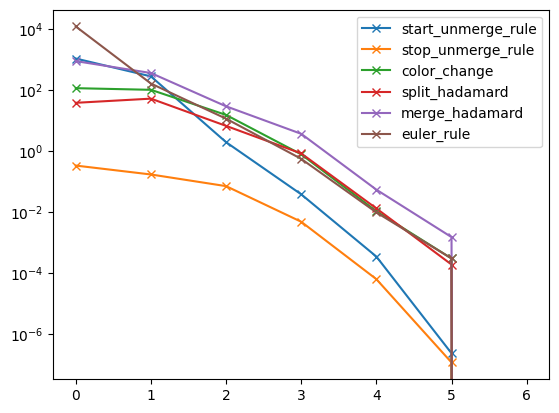

In [10]:
plt.figure()
for i, div in enumerate(means_prob_div): 
    if i < oc.N_NODE_ACTIONS:
        plt.plot(div-1, label=get_action_name(i), marker="x")
plt.legend()
plt.yscale("log")

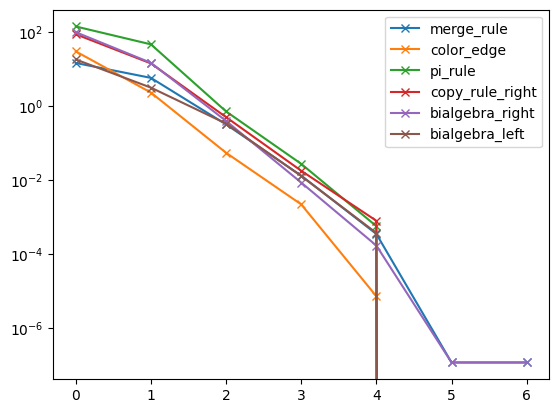

In [9]:
plt.figure()
for i, div in enumerate(means_prob_div): 
    if i >= oc.N_NODE_ACTIONS:
        plt.plot(div-1, label=get_action_name(i), marker="x")
plt.legend()
plt.yscale("log")